#importing libraries


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression
import pickle
from sklearn.neighbors import KNeighborsClassifier


# data description and eda


In [ ]:
diaDF = pd.read_csv('/content/diabetes.csv')

In [ ]:
diaDF

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
diaDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
diaDF.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
diaDF.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [ ]:
diaDF['BloodPressure']

0      72
1      66
2      64
3      66
4      40
       ..
763    76
764    70
765    72
766    60
767    70
Name: BloodPressure, Length: 768, dtype: int64

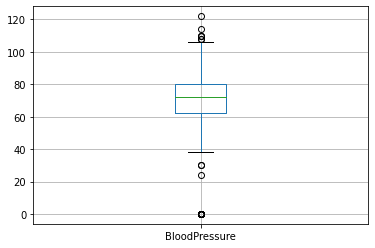

In [ ]:
diaDF.boxplot(column=['BloodPressure'])

In [ ]:
diaDF=diaDF[diaDF['BloodPressure']>30]

In [ ]:
diaDF=diaDF[diaDF['BloodPressure']<110]

In [ ]:
diaDF.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1
10,4,110,92,0,0,37.6,0.191,30,0


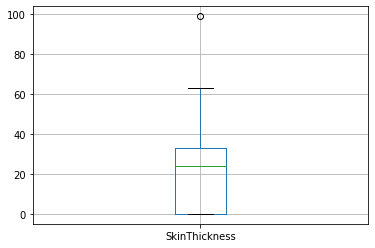

In [ ]:
diaDF.boxplot(column=['SkinThickness'])

In [ ]:
diaDF['SkinThickness'].value_counts()

0     192
32     31
30     26
27     23
23     21
33     20
18     20
28     20
39     18
31     18
29     17
19     17
40     16
22     16
37     16
26     16
25     16
41     15
35     15
17     14
15     14
36     14
20     13
13     11
24     11
42     10
21     10
34      8
12      7
46      7
38      6
43      6
45      6
14      6
11      6
16      6
10      5
44      5
47      4
48      4
49      3
50      3
54      2
7       2
8       2
52      2
60      1
56      1
63      1
51      1
99      1
Name: SkinThickness, dtype: int64

In [ ]:
mean_thickness = diaDF['SkinThickness'].dropna().mean()

In [ ]:
mean_thickness

21.40551724137931

In [ ]:
diaDF['SkinThickness']=diaDF.SkinThickness.mask(diaDF.SkinThickness == 0,mean_thickness)

In [ ]:
diaDF.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35.000000,0,33.6,0.627,50,1
1,1,85,66,29.000000,0,26.6,0.351,31,0
2,8,183,64,21.405517,0,23.3,0.672,32,1
3,1,89,66,23.000000,94,28.1,0.167,21,0
4,0,137,40,35.000000,168,43.1,2.288,33,1
5,5,116,74,21.405517,0,25.6,0.201,30,0
6,3,78,50,32.000000,88,31.0,0.248,26,1
8,2,197,70,45.000000,543,30.5,0.158,53,1
9,8,125,96,21.405517,0,0.0,0.232,54,1
10,4,110,92,21.405517,0,37.6,0.191,30,0


In [ ]:
mean_insulin = diaDF['Insulin'].dropna().mean()

In [ ]:
mean_insulin

83.73655172413793

In [ ]:
diaDF['Insulin']=diaDF.Insulin.mask(diaDF.Insulin == 0,mean_insulin)

In [ ]:
diaDF.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35.000000,83.736552,33.6,0.627,50,1
1,1,85,66,29.000000,83.736552,26.6,0.351,31,0
2,8,183,64,21.405517,83.736552,23.3,0.672,32,1
3,1,89,66,23.000000,94.000000,28.1,0.167,21,0
4,0,137,40,35.000000,168.000000,43.1,2.288,33,1
5,5,116,74,21.405517,83.736552,25.6,0.201,30,0
6,3,78,50,32.000000,88.000000,31.0,0.248,26,1
8,2,197,70,45.000000,543.000000,30.5,0.158,53,1
9,8,125,96,21.405517,83.736552,0.0,0.232,54,1
10,4,110,92,21.405517,83.736552,37.6,0.191,30,0


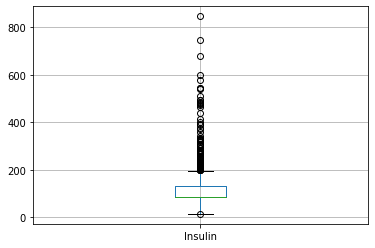

In [ ]:
diaDF.boxplot(column=['Insulin'])

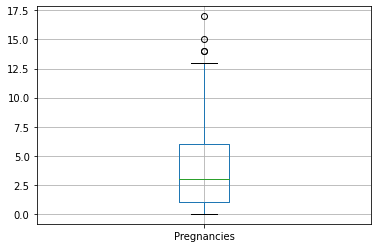

In [ ]:
diaDF.boxplot(column=['Pregnancies'])

In [ ]:
diaDF['Pregnancies'].value_counts()

1     130
0     100
2      96
3      72
4      64
5      57
6      47
7      42
8      37
9      27
10     22
11     10
12      9
13      8
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

#datavisualization


                          Pregnancies   Glucose  ...       Age   Outcome
Pregnancies                  1.000000  0.128215  ...  0.556470  0.227571
Glucose                      0.128215  1.000000  ...  0.255088  0.461156
BloodPressure                0.207686  0.206607  ...  0.338078  0.171360
SkinThickness                0.023413  0.154054  ...  0.033073  0.189006
Insulin                     -0.019951  0.400172  ...  0.036221  0.189890
BMI                          0.021964  0.203461  ...  0.006168  0.278780
DiabetesPedigreeFunction    -0.032204  0.133042  ...  0.018273  0.179658
Age                          0.556470  0.255088  ...  1.000000  0.247120
Outcome                      0.227571  0.461156  ...  0.247120  1.000000

[9 rows x 9 columns]


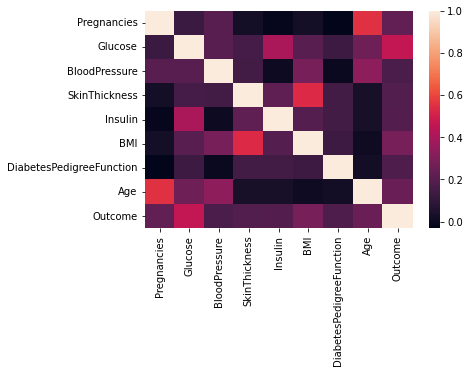

In [ ]:
corr = diaDF.corr()
print(corr)
sns.heatmap(corr, 
         xticklabels=corr.columns, 
         yticklabels=corr.columns)


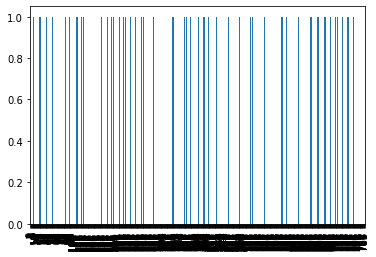

In [ ]:
diaDF['Outcome'].plot(kind="bar")

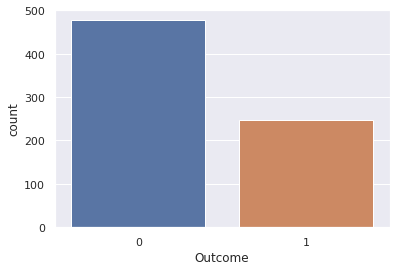

In [ ]:
sns.set(style="darkgrid")
ax = sns.countplot(x="Outcome", data=diaDF)

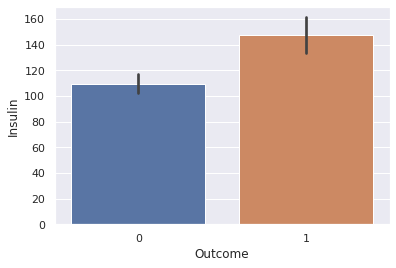

In [ ]:
sns.set(style="darkgrid")
ax = sns.barplot(y="Insulin",x="Outcome", data=diaDF)

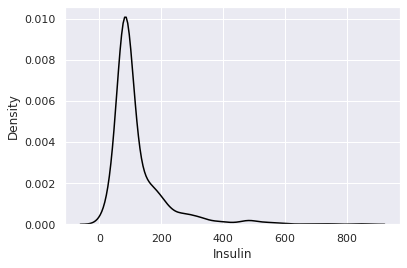

In [ ]:
sns.kdeplot(x = 'Insulin' , data = diaDF , color = 'black')

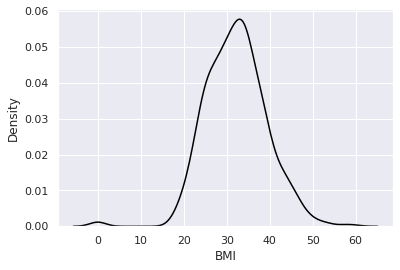

In [ ]:
sns.kdeplot(x = 'BMI' , data = diaDF , color = 'black')

In [ ]:
diaDF.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
x = diaDF[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']].values
y = diaDF[['Outcome']].values

#using logistic regression


In [ ]:
diaDF['Outcome'].value_counts(
)

0    477
1    248
Name: Outcome, dtype: int64

In [ ]:
x_u = diaDF[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]
y_u = diaDF[['Outcome']]

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
rus=RandomUnderSampler()

In [ ]:
x_u,y_u=rus.fit_resample(x_u,y_u)

In [ ]:
x_u.shape,y_u.shape

((496, 8), (496, 1))

In [ ]:
from sklearn.model_selection import train_test_split
xu_train,xu_test,yu_train,yu_test = train_test_split(x_u,y_u)

In [ ]:

from sklearn.linear_model import LogisticRegression
lr_u=LogisticRegression()
lr_u.fit(xu_train,yu_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
yu_pred=lr_u.predict(xu_test)
yu_pred

array([1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(yu_test,yu_pred)

0.7580645161290323

In [ ]:
filename = 'lr_model2.sav'
pickle.dump(lr, open(filename, 'wb'))
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(xu_test, yu_test)
print(result)

0.717741935483871


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


#xgboost


In [ ]:
pip install xgboost

In [ ]:
import xgboost as xgb

In [ ]:
train = xgb.DMatrix(xu_train , label = yu_train)
test = xgb.DMatrix(xu_test , label = yu_test)

In [ ]:
params =  {
    'max_depth':5,
    'eta':0.5,
    'objective':'multi:softmax',
    'num_class':5}
epochs = 20

In [ ]:
model = xgb.train(params,train,epochs)

In [ ]:
predicta = model.predict(test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(yu_test,predicta)

0.75